<a href="https://colab.research.google.com/github/thedarredondo/data-science-fundamentals/blob/main/Unit7/Unit7ExercisesSF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fitting Curves: Concepts

What you'll do:

- Answer questions about what a GP is, and its relationship to GLMs and splines.
- Practice applying one of: polynomial modeling, b splines, or GPs
- You'll get a chance to read about and try to comprehend a more standard implementation of a GP.

Have fun!

## Task1

Why would you ever want to include a polynomial element in a model you built? What's the benefit of using polynomials to model?

---

A linear model is a degree-1 polynomial model. The reason why we would want to use a polynomial is because they are good at approximating relationships in our data. The greater the degree, the more freedom the model has to represent minute nuances in our data. This comes at a tradeoff: the model may overfit, causing it to focus on details in data that do not aid in understanding its relationships.

## Task2

Why would you ever NOT want to include a polynomial element in a model you built?

---

If the data can be represented by a simpler model, it would be better to use that to prevent overfitting. ALso, if the model has complex relationships but we are still worried about overfitting, a B-spline could work better. Furthermore, we could use NN's and GP's to model even more powerfully, with the drawback being that these solutions are computationally expensive.

## Task3

What's the point of using b splines?

---

B-splines are good for fitting complicated data. This is an advantage shared with polynomial models, in that they are good at modeling complex relationships. Plus, B-splines have the advantage that they overfit less. The biggest issue with them is that control points influence them, and their amount and location must be chosen.

## Task4

Describe what a Gaussian Process is, in your own words. *Don't worry about being correct, just try to explain it to yourself*. I will not grade this question for accuracy.

---

A gaussian process is, I think, an infinite-variable multivariate Gaussian (Normal) distribution. So, every finite set of random variables of the GP is a multivariate normal distribution. Rather than giving us a single function to fit the data, a Gaussian process gives us many. Also, we can view a gaussian process as a generalization of a neural network where each data point is a knot. Thus, a GP is a powerful predictive tool that comes at the cost of time and memory.

Sources:

- https://yugeten.github.io/posts/2019/09/GP/
- https://handwiki.org/wiki/Gaussian_process

## Task5

Refit a model to the howell data, using one of the following: polynomial model, b splines, or GPs.
Plot the posterior predictive check on a scatter plot

You only need to use one. Remember, the simpler the model is, the better (usually).

Hint: If you use a polynomial or bspline, try a disdributional model

---

In [1]:
import pandas as pd
import bambi as bmb
import matplotlib.pyplot as plt

In [2]:
dftask5 = pd.read_csv("../Data/howell.csv"); dftask5

,height,weight,age,male
0,151.765,47.825606,63.0,1
1,139.700,36.485807,63.0,0
2,136.525,31.864838,65.0,0
3,156.845,53.041914,41.0,1
4,145.415,41.276872,51.0,0
...,...,...,...,...
539,145.415,31.127751,17.0,1
540,162.560,52.163080,31.0,1
541,156.210,54.062497,21.0,0
542,71.120,8.051258,0.0,1


In [3]:
mtask5 = bmb.Model("height ~ poly(weight, degree=4)", dftask5, family="negativebinomial")
idata_mtask5 = mtask5.fit()

Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [alpha, Intercept, poly(weight, degree=4)]


Output()

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 5 seconds.
There were 4 divergences after tuning. Increase `target_accept` or reparameterize.


/home/maxim/school/lasa/2024-2025/data-science/data-science-fundamentals/venv/lib/python3.12/site-packages/arviz/rcparams.py:368: FutureWarning: stats.hdi_prob is deprecated since 0.18.0, use stats.ci_prob instead
  warnings.warn(
Default computed for conditional variable: weight


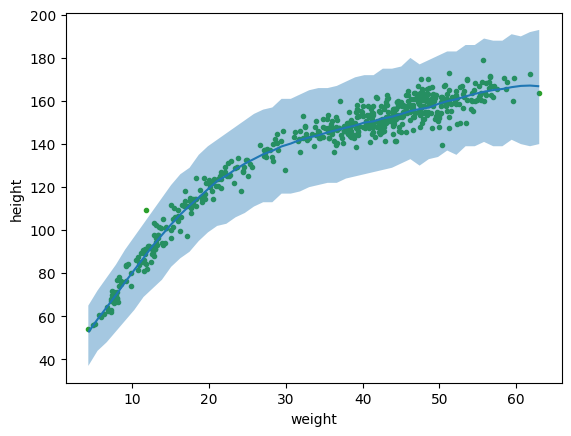

In [4]:
bmb.interpret.plot_predictions(mtask5, idata_mtask5, "weight", pps=True)
plt.plot(dftask5.weight, dftask5.height, "C2.", zorder=-3)

## Task6

Read the article on the pymc website about GP implementation on the Mauna Loa CO$_{2}$ data combined with CO$_{2}$ ice core data from the south pole.
[Link here.](https://www.pymc.io/projects/examples/en/latest/gaussian_processes/GP-MaunaLoa2.html)

Write down one thing you learned about GPs from reading the article.

Note: You probably won't understand anything in this article. The main point of this task is to hammer home that good GP implementations are extremely technical.

---

GP Models can be tuned with covariance and mean functions to model prior knowledge and incorporate different datasets into a single model. Furthermore, covariance functions can be combined allowing for a lot of flexibility.

## Task7

Describe your favorite graph from the article in the previous task. Explain why its your favorite.

---

![A graph showing past, present, and forecast CO2 measurements with prior, observed, and test data overlaid on top of a curve sampled from the posterior, showing an increasing concave up trend in CO2 levels](favorite-graph.webp)

This is my favorite graph because it shows the power of GP models. I think it's really cool that the model can use past data to predict the future. You can tell that it does so quite well, since the test set aligns with the model's predictions. The incorporation of priors and different types of data is a strength of GP models that I would like to explore further.